In [1]:
#Take Home Assignment

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
raw_data = pd.read_excel('/Users/greshashah126/Desktop/Take Home/Raw_Data.xlsx')
raw_data.head()

,Customer,Check-In Questionnaire: What persuaded you to choose our hotel for your stay?,Check-Out Questionnaire: What impressed you the most during your stay?
0,Customer1,Delicious Breakfast; Fast and Reliable Wi-Fi; ...,Fast and Reliable Wi-Fi; Delicious Breakfast
1,Customer2,Quiet and Restful Environment; Fast and Reliab...,Quiet and Restful Environment; Fast and Reliab...
2,Customer3,Reservation & Communication; Fast and Reliable...,Fast and Reliable Wi-Fi; Reservation & Communi...
3,Customer4,Stylish Interior Design; Quiet and Restful Env...,Quiet and Restful Environment; Friendly and He...
4,Customer5,Stylish Interior Design; Quiet and Restful Env...,Reservation & Communication


In [6]:
def split_and_clean(text):
    if pd.isna(text):
        return []
    return [item.strip() for item in text.split(';') if item.strip()]
raw_data['Check-In Questionnaire: What persuaded you to choose our hotel for your stay?'] = raw_data['Check-In Questionnaire: What persuaded you to choose our hotel for your stay?'].apply(split_and_clean)
raw_data['Check-Out Questionnaire: What impressed you the most during your stay?'] = raw_data['Check-Out Questionnaire: What impressed you the most during your stay?'].apply(split_and_clean)

In [9]:
options = [
    "Comfortable and Clean Rooms",
    "Delicious Breakfast",
    "Fast and Reliable Wi-Fi",
    "Friendly and Helpful Staff",
    "Quiet and Restful Environment",
    "Modern Fitness Facilities",
    "Family-Friendly Services",
    "Business Amenities",
    "Easy Parking & Check-in",
    "Stylish Interior Design",
    "Reservation & Communication"
]

In [10]:
for option in options:
    raw_data[f'CheckIn_{option}'] = raw_data['Check-In Questionnaire: What persuaded you to choose our hotel for your stay?'].apply(lambda x: 1 if option in x else 0)
    raw_data[f'CheckOut_{option}'] = raw_data['Check-Out Questionnaire: What impressed you the most during your stay?'].apply(lambda x: 1 if option in x else 0)

In [12]:
raw_data

,Customer,Check-In Questionnaire: What persuaded you to choose our hotel for your stay?,Check-Out Questionnaire: What impressed you the most during your stay?,CheckIn_Comfortable and Clean Rooms,CheckOut_Comfortable and Clean Rooms,CheckIn_Delicious Breakfast,CheckOut_Delicious Breakfast,CheckIn_Fast and Reliable Wi-Fi,CheckOut_Fast and Reliable Wi-Fi,CheckIn_Friendly and Helpful Staff,...,CheckIn_Family-Friendly Services,CheckOut_Family-Friendly Services,CheckIn_Business Amenities,CheckOut_Business Amenities,CheckIn_Easy Parking & Check-in,CheckOut_Easy Parking & Check-in,CheckIn_Stylish Interior Design,CheckOut_Stylish Interior Design,CheckIn_Reservation & Communication,CheckOut_Reservation & Communication
0,Customer1,"[Delicious Breakfast, Fast and Reliable Wi-Fi,...","[Fast and Reliable Wi-Fi, Delicious Breakfast]",0,0,1,1,1,1,1,...,1,0,0,0,1,0,0,0,0,0
1,Customer2,"[Quiet and Restful Environment, Fast and Relia...","[Quiet and Restful Environment, Fast and Relia...",0,0,0,0,1,1,1,...,0,0,0,0,1,1,0,0,0,0
2,Customer3,"[Reservation & Communication, Fast and Reliabl...","[Fast and Reliable Wi-Fi, Reservation & Commun...",0,0,1,1,1,1,0,...,1,1,0,0,0,0,0,0,1,1
3,Customer4,"[Stylish Interior Design, Quiet and Restful En...","[Quiet and Restful Environment, Friendly and H...",0,0,0,0,1,1,1,...,0,0,0,0,0,0,1,0,0,0
4,Customer5,"[Stylish Interior Design, Quiet and Restful En...",[Reservation & Communication],0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,1
5,Customer6,"[Comfortable and Clean Rooms, Quiet and Restfu...","[Comfortable and Clean Rooms, Quiet and Restfu...",1,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
6,Customer7,"[Comfortable and Clean Rooms, Quiet and Restfu...","[Quiet and Restful Environment, Modern Fitness...",1,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
7,Customer8,"[Comfortable and Clean Rooms, Quiet and Restfu...","[Comfortable and Clean Rooms, Quiet and Restfu...",1,1,1,0,0,0,1,...,1,0,1,1,0,0,0,0,0,0
8,Customer9,"[Easy Parking & Check-in, Modern Fitness Facil...","[Modern Fitness Facilities, Comfortable and Cl...",1,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9,Customer10,"[Quiet and Restful Environment, Reservation & ...","[Fast and Reliable Wi-Fi, Reservation & Commun...",0,0,1,1,1,1,0,...,0,0,0,0,0,0,1,0,1,1


In [16]:
file_path = '/Users/greshashah126/Desktop/Take Home/Raw_Data.xlsx'
with pd.ExcelWriter(file_path, engine='openpyxl', mode='a') as writer:
    raw_data.to_excel(writer, sheet_name='Cleaned_Data', index=False)

In [31]:
# Extract just the option names (removing CheckIn_ / CheckOut_ prefixes)
features = [col.replace("CheckIn_", "") for col in raw_data.columns if col.startswith("CheckIn_")]

# Create clean column mappings
checkin_columns = [f"CheckIn_{feature}" for feature in features]
checkout_columns = [f"CheckOut_{feature}" for feature in features]
# Step 2: Compute correlation matrices
# Create correlation matrices
checkin_corr = raw_data[checkin_columns].corr()
checkin_corr.index = features
checkin_corr.columns = features

checkout_corr = raw_data[checkout_columns].corr()
checkout_corr.index = features
checkout_corr.columns = features

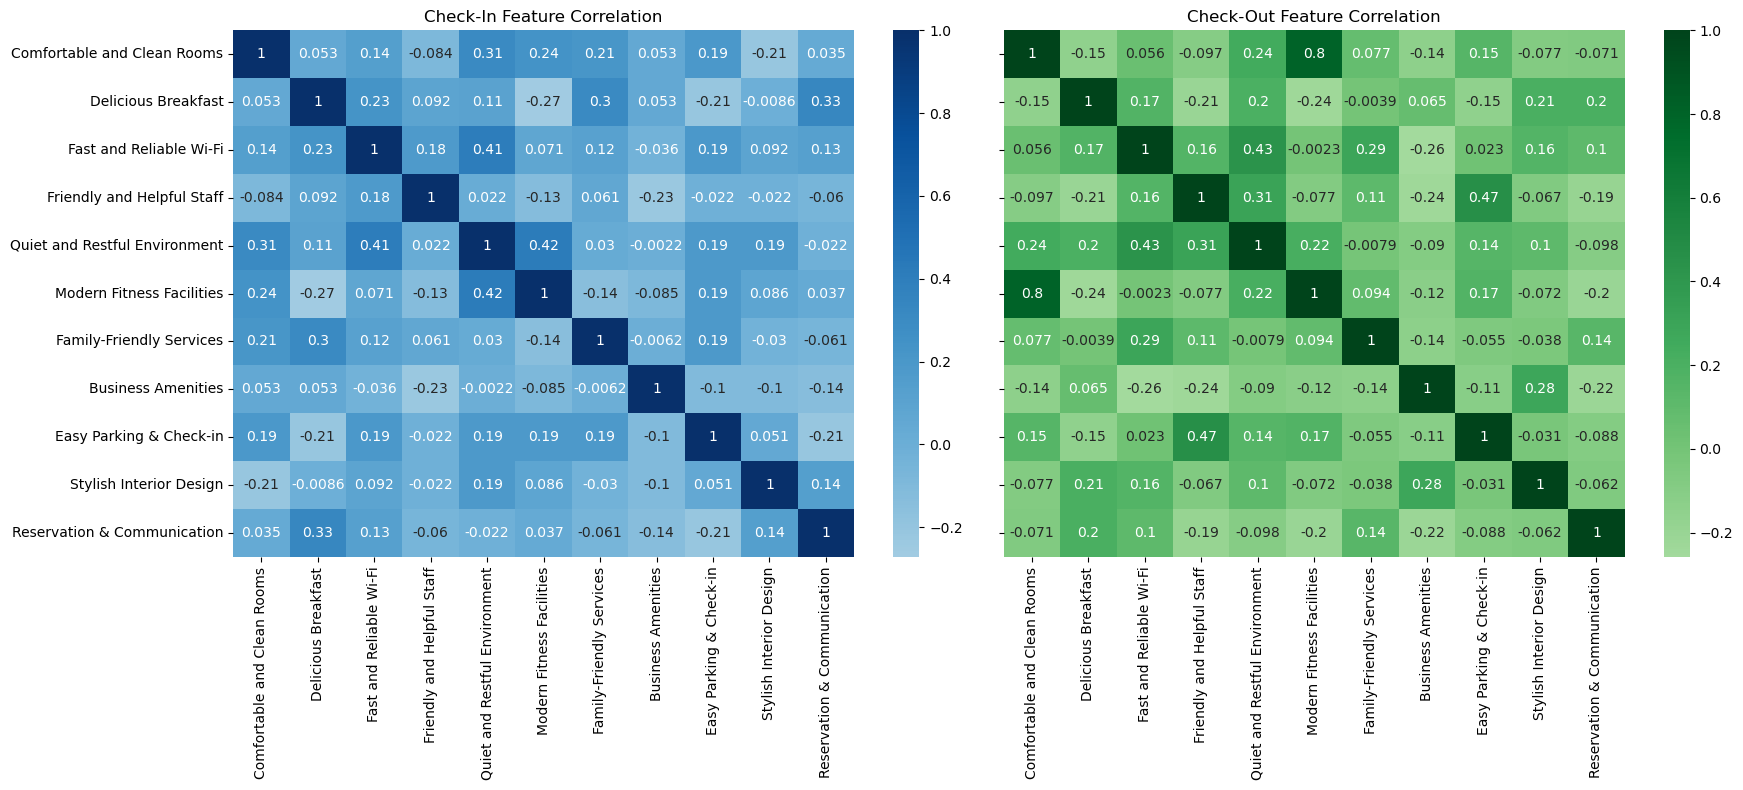

<Figure size 640x480 with 0 Axes>

In [34]:
# Step 3: Plot side-by-side heatmaps
fig, axes = plt.subplots(1, 2, figsize=(18, 8), sharey=True)

# Check-In Heatmap
sns.heatmap(checkin_corr, ax=axes[0], annot=True, cmap="Blues", center=0)
axes[0].set_title("Check-In Feature Correlation")
axes[0].tick_params(axis='x', rotation=90)
axes[0].tick_params(axis='y', rotation=0)

# Check-Out Heatmap
sns.heatmap(checkout_corr, ax=axes[1], annot=True, cmap="Greens", center=0)
axes[1].set_title("Check-Out Feature Correlation")
axes[1].tick_params(axis='x', rotation=90)
axes[1].tick_params(axis='y', rotation=0)

plt.tight_layout()
plt.show()

plt.suptitle("Correlation Between Guest-Selected Features (Check-In vs Check-Out)", fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()